# APRENDIZADO POR REFORÇO: JOGO FROZEN LAKE

O objetivo do agente no ambiente Frozen Lake é alcançar o objetivo final (representado pelo 'G') no menor número de passos, evitando cair nos buracos (representados por 'H'). O ambiente é uma grade onde o agente pode se mover para cima, baixo, esquerda ou direita.

In [22]:
import numpy as np
import gymnasium as gym
import random
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
from gymnasium.envs.toy_text.frozen_lake import generate_random_map


## Espaço de Ações
O espaço de ações no Frozen Lake é discreto, com 4 ações possíveis:

- **0:** Esquerda (Left)
- **1:** Para baixo (Down)
- **2:** Direita (Right)
- **3:** Para cima (Up)

Essas ações determinam o movimento do agente na grade.

## Espaço de Observações
O espaço de observações é representado pelos estados do ambiente, que são as posições do agente na grade. Cada posição é identificada por um índice único. O tamanho do espaço de observação depende do tamanho da grade (4x4, por exemplo, resulta em 16 estados possíveis).

## Valores de Recompensa
As recompensas no Frozen Lake são atribuídas da seguinte forma:

- **+1:** Quando o agente alcança o objetivo ('G').
- **0:** Para movimentos que não levam ao buraco ('H') ou ao objetivo.
- **-inf (implícito):** Se o agente cair em um buraco ('H'), o episódio termina sem recompensa.

In [23]:
# Configurações do ambiente FrozenLake

random_map = generate_random_map(size=4, p=0.8) # Gera um mapa aleatório
env = gym.make("FrozenLake-v1", render_mode="ansi", is_slippery=False, desc=random_map)
env.reset()
env.render()
print(env.render())



SFFF
HFHF
FHHF
HFFG



## Processo de Treinamento para Formação da Tabela Q
Algoritmo de aprendizado por reforço que busca aprender uma política ótima para o agente. A tabela \( Q[s, a] \) armazena os valores de recompensa esperada para cada estado \( s \) e ação \( a \). 

O processo de treinamento segue os passos:
1. Inicializar a tabela Q com valores zeros.
2. Para cada episódio:
   - Observar o estado inicial.
   - Escolher uma ação com base em uma política (e.g., epsilon-greedy).
   - Executar a ação e observar a recompensa e o próximo estado.
   - Atualizar o valor \( Q[s, a] \) usando a equação:
     
     \[Q(s,a)←Q(s,a)+α[r+γ* amax * Q(s′,a) − Q(s,a)]\]
   - Repetir até o fim do episódio (quando o agente chega ao objetivo ou cai em um buraco).
3. Ajustar os hiperparâmetros  (α , γ , ϵ) para melhorar o aprendizado.

In [24]:
num_states = env.observation_space.n
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [25]:
alpha = 0.1  # Taxa de aprendizado
gamma = 0.99  # Fator de desconto
epsilon = 0.05 # Taxa de exploração inicial
num_episodes =700

In [26]:
# Variáveis para armazenar métricas
total_rewards = []
total_steps = []
success_rate = []
penalty_rate = []

### JOGO COM PENALIZAÇOES ORIGINAIS

- **+1:** Quando o agente alcança o objetivo ('G').
- **0:** Para movimentos que não levam ao buraco ('H') ou ao objetivo.
- **-inf (implícito):** Se o agente cair em um buraco ('H'), o episódio termina sem recompensa.

In [27]:
for episode in range(num_episodes):
    
    state, _ = env.reset()
    sum_rewards, steps, penalty = 0, 0, 0
    done = False

    while not done:
        # Exploração -> ação aleatória
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() 
        # Exploitação -> ação definida na tabela Q
        else:
            action = np.argmax(q_table[state])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        if done and reward == 1:  # Objetivo alcançado
            reward = 1
        elif done and reward == 0:  # Caiu no buraco
            reward = -1
            penalty += 1
        else:  # Movimento válido sem alcançar objetivo ou buraco
            reward = 0

        q_old = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = (1 - alpha) * q_old + alpha * (reward + gamma * next_max)

        state = next_state
        sum_rewards += reward
        steps += 1

    
    total_rewards.append(sum_rewards)
    total_steps.append(steps)
    penalty_rate.append(penalty)
    success_rate.append(1 if sum_rewards > 0 else 0)

    if (episode + 1) % 100 == 0:
        clear_output(wait=True)
        print(f"Episódio: {episode + 1}, Taxa de sucesso: {np.mean(success_rate[-100:]) * 100:.2f}%")
        time.sleep(0.1)

        # TROCA O MAPA A CADA 100 EPISÓDIOS
        # random_map = generate_random_map(size=4, p=0.8)
        # env = gym.make("FrozenLake-v1", render_mode="ansi", is_slippery=True, desc=random_map)

print("\nTreinamento concluído!...epocas de treinamento: ", num_episodes)
print(f"\nNúmero de sucessos: {np.sum(success_rate)}")
print(f"Número de penalidades: {np.sum(penalty_rate)}")
print(f"Recompensa média: {np.mean(total_rewards)}")
print(f"Taxa de penalização média: {np.mean(penalty_rate) * 100:.2f}%")
print(f"Taxa de sucesso média: {np.mean(success_rate) * 100:.2f}%")

Episódio: 700, Taxa de sucesso: 95.00%

Treinamento concluído!...epocas de treinamento:  700

Número de sucessos: 643
Número de penalidades: 57
Recompensa média: 0.8371428571428572
Taxa de penalização média: 8.14%
Taxa de sucesso média: 91.86%


### Q-TABLE FINAL 

In [28]:
print(q_table)

[[ 0.53497368 -0.6861894   0.95099005  0.37711188]
 [ 0.57586217  0.02061934  0.96059601  0.26524291]
 [ 0.57288456 -0.71757046  0.970299    0.5608817 ]
 [ 0.58165252  0.9801      0.53852281  0.55196754]
 [ 0.          0.          0.          0.        ]
 [-0.19       -0.19       -0.19        0.34104146]
 [ 0.          0.          0.          0.        ]
 [-0.56953279  0.99        0.33704631  0.33309036]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.6861894   1.          0.46386064  0.67616108]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


## Teste do modelo



In [29]:
episodes = 10
epochs = 0
success = 0
steps_val = []
penalty_val = []

In [30]:
for _ in range(episodes):
    # mapa aleatório
    # random_map = generate_random_map(size=4, p=0.8)
    # env = gym.make("FrozenLake-v1", render_mode="ansi", is_slippery=True, desc=random_map)
    state, _ = env.reset()
    steps, penalty = 0, 0
    done = False

    while not done:
        action = np.argmax(q_table[state])
        print(f"Açao: {action}")
        state, reward, done, _, _ = env.step(action)
        steps += 1

        if reward == 1:
            success += 1

        if reward == 0 and done: # caiu no buraco
            penalty += 1
            
    epochs += 1

    clear_output(wait=True)
    print(env.render())
    time.sleep(.3)

    steps_val.append(steps)
    penalty_val.append(penalty)

print(f"\nResultados da Avaliação:")
print(f"Taxa de sucesso: {(success / episodes) * 100:.2f}%")
print(f"Número de sucessos: {success}")
print(f"Número de penalidades: {np.sum(penalty_val)}")
print(f"Taxa de penalização: {np.mean(penalty_val) * 100:.2f}%")
print(f"Média de passos por episódio: {np.mean(steps_val):.2f}")


  (Down)
SFFF
HFHF
FHHF
HFFG


Resultados da Avaliação:
Taxa de sucesso: 100.00%
Número de sucessos: 10
Número de penalidades: 0
Taxa de penalização: 0.00%
Média de passos por episódio: 6.00


## Analises Gráfica

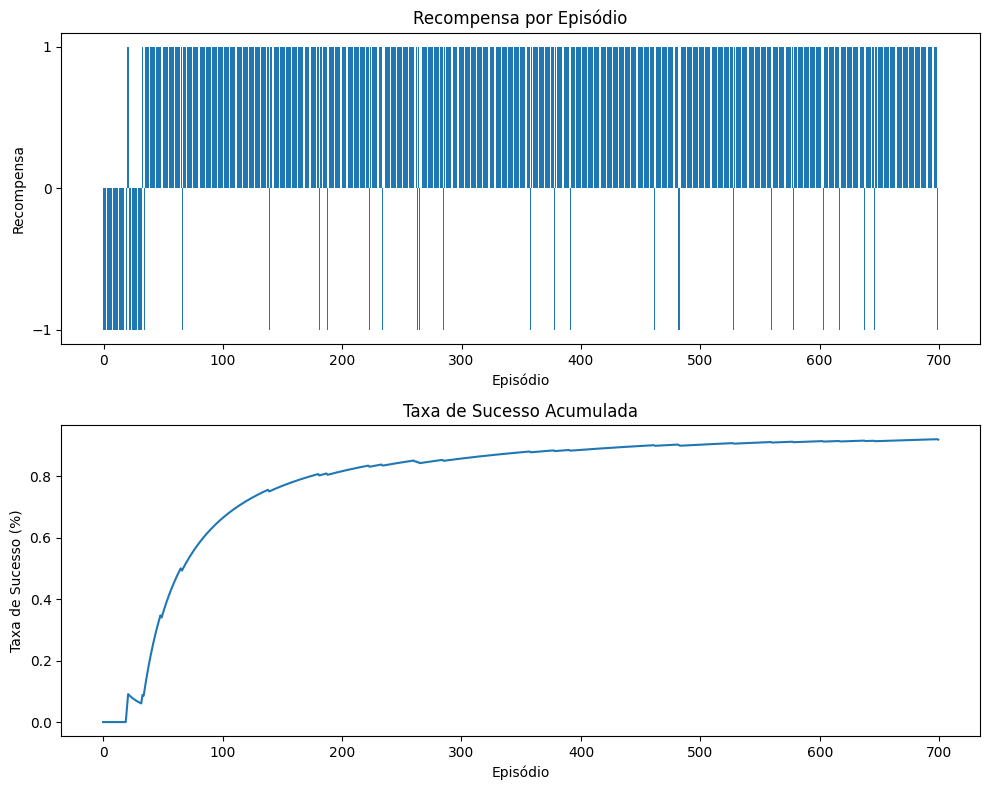

In [31]:
plt.figure(figsize=(10, 8))

# Gráfico de Recompensa por Episódio usando Barras
plt.subplot(2, 1, 1)
plt.bar(range(len(total_rewards)), total_rewards)
plt.title("Recompensa por Episódio")
plt.xlabel("Episódio")
plt.ylabel("Recompensa")
plt.yticks([-1, 0, 1])

# Gráfico de Taxa de Sucesso
plt.subplot(2, 1, 2)
plt.plot(np.cumsum(success_rate) / np.arange(1, num_episodes + 1))
plt.title("Taxa de Sucesso Acumulada")
plt.xlabel("Episódio")
plt.ylabel("Taxa de Sucesso (%)")

plt.tight_layout()
plt.show()